In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import random as rd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df_personality = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/k-means-psicologia.csv")
df_personality.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
df_personality.describe()
df_personality.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

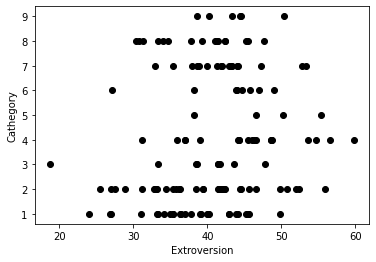

In [ ]:
X = df_personality[["ex", "categoria"]]
plt.scatter(X["ex"],X["categoria"],c='black')
plt.xlabel('Extroversion')
plt.ylabel('Cathegory')
plt.show()

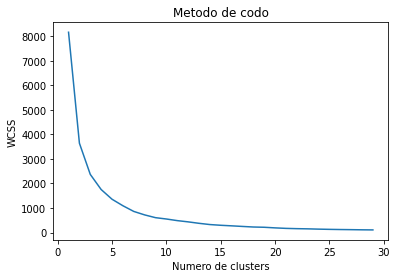

In [ ]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
print(centroids)
print(labels)

[[43.61307017  2.34285714]
 [35.97673572  3.        ]
 [27.87274147  3.4       ]
 [42.73247675  7.46875   ]
 [52.20733605  4.10526316]]
[3 1 1 4 4 3 3 4 3 1 0 1 1 1 3 0 0 3 0 0 4 0 2 3 0 1 3 0 0 1 3 1 0 3 4 4 4
 4 0 1 4 4 3 1 1 2 3 1 0 4 0 3 3 2 2 1 2 0 2 1 1 1 1 1 3 3 2 2 1 4 3 1 3 0
 3 1 3 4 4 3 0 0 2 0 1 3 0 0 1 0 1 1 1 0 0 3 3 0 0 1 1 1 0 4 2 1 0 3 3 1 3
 3 3 4 4 0 2 2 0 3 1 0 4 1 1 2 2 0 0 1 0 0 1 3 1 3 4 2 1 0]


In [ ]:
colores=['red','cyan','green','yellow','purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])

[43.61307017 35.97673572 27.87274147 42.73247675 52.20733605]


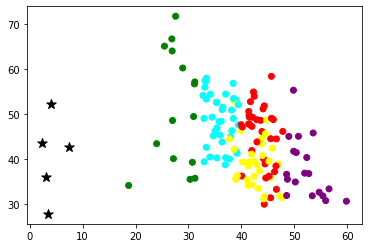

In [ ]:
print(centroids[:, 0])
# mostramos grupos según Openess y Extraversion 
f1 = df_personality['ex'].values
f2 = df_personality['op'].values
plt.scatter(f1, f2, c=asignar)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()